<a href="https://colab.research.google.com/github/InannaxX07/ANUSHREE_SCIFOR/blob/main/CNN_Miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's use the MNIST database for making our CNN handwritten number classifier. We will be using keras here.

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

Loading the database

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Training...

In [3]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [4]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

Now let's first try to display a sample and get a view of our database.

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


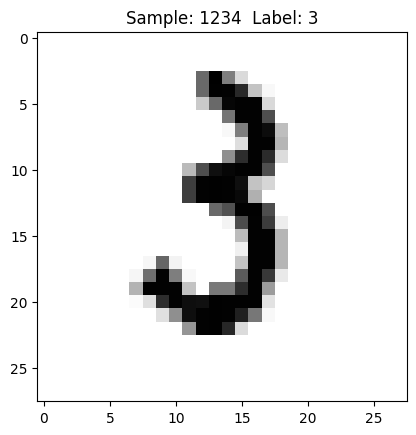

In [5]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label
    print(train_labels[num])
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

display_sample(1234)

Activating our model.

In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

Lets see a summary of our model for deeper insight.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Calculating accuracy at every epoch.

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/10
600/600 - 6s - loss: 0.2453 - accuracy: 0.9285 - val_loss: 0.1283 - val_accuracy: 0.9634 - 6s/epoch - 11ms/step
Epoch 2/10
600/600 - 5s - loss: 0.0982 - accuracy: 0.9710 - val_loss: 0.0845 - val_accuracy: 0.9736 - 5s/epoch - 9ms/step
Epoch 3/10
600/600 - 6s - loss: 0.0655 - accuracy: 0.9798 - val_loss: 0.0736 - val_accuracy: 0.9764 - 6s/epoch - 10ms/step
Epoch 4/10
600/600 - 5s - loss: 0.0474 - accuracy: 0.9859 - val_loss: 0.0707 - val_accuracy: 0.9789 - 5s/epoch - 9ms/step
Epoch 5/10
600/600 - 6s - loss: 0.0350 - accuracy: 0.9891 - val_loss: 0.0632 - val_accuracy: 0.9807 - 6s/epoch - 9ms/step
Epoch 6/10
600/600 - 5s - loss: 0.0272 - accuracy: 0.9922 - val_loss: 0.0692 - val_accuracy: 0.9795 - 5s/epoch - 8ms/step
Epoch 7/10
600/600 - 5s - loss: 0.0196 - accuracy: 0.9940 - val_loss: 0.0612 - val_accuracy: 0.9808 - 5s/epoch - 9ms/step
Epoch 8/10
600/600 - 6s - loss: 0.0155 - accuracy: 0.9958 - val_loss: 0.0636 - val_accuracy: 0.9816 - 6s/epoch - 10ms/step
Epoch 9/10
600/600 - 

Total evaluation of our model.

In [10]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06418716162443161
Test accuracy: 0.9824000000953674


Displaying what our model got wrong.

1/1 [==============================] - 0s 23ms/step


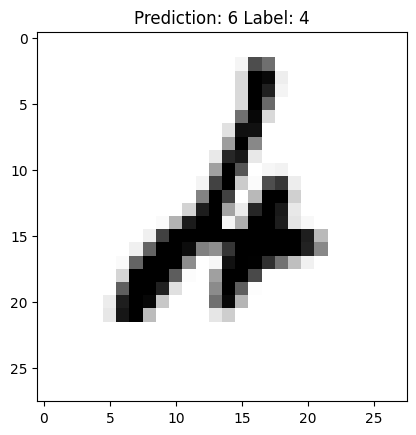

1/1 [==============================] - 0s 20ms/step


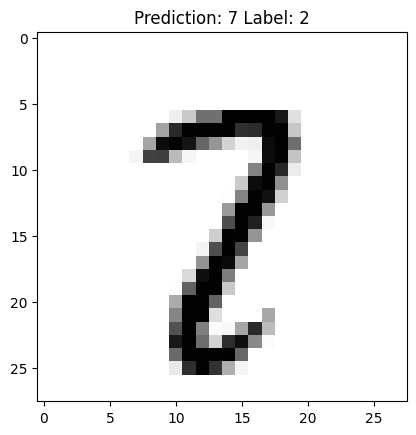

1/1 [==============================] - 0s 30ms/step


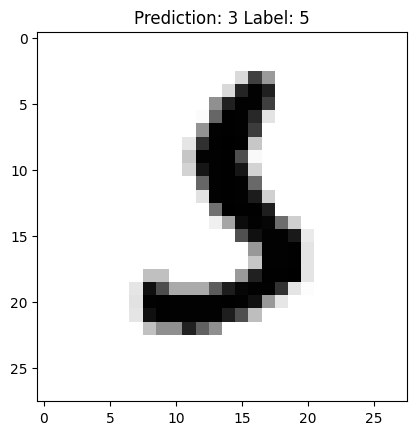

1/1 [==============================] - 0s 23ms/step


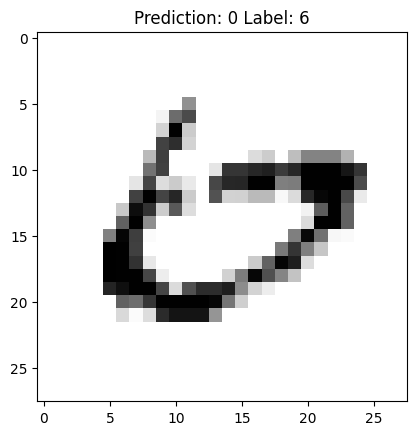

1/1 [==============================] - 0s 22ms/step


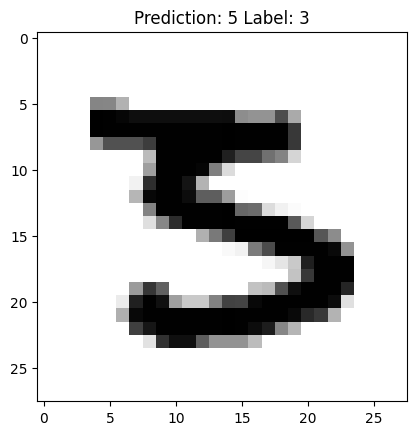

1/1 [==============================] - 0s 25ms/step


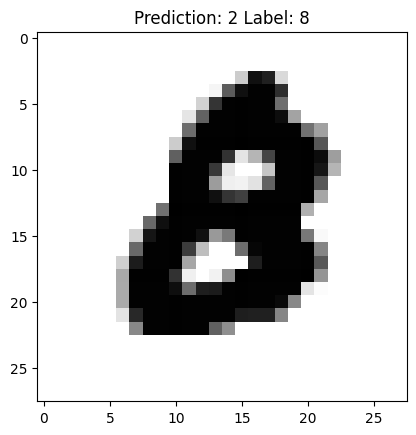

1/1 [==============================] - 0s 22ms/step


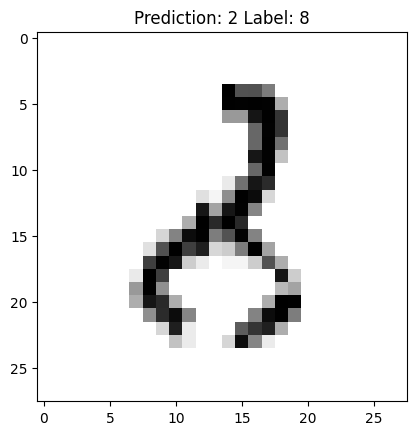

1/1 [==============================] - 0s 26ms/step


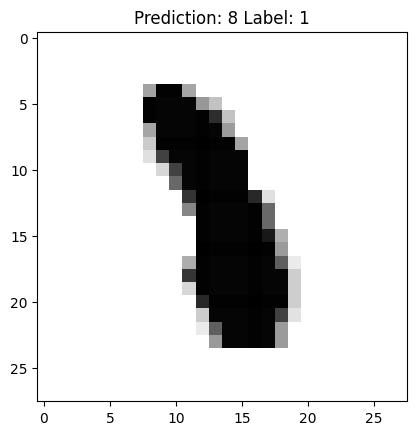

1/1 [==============================] - 0s 26ms/step


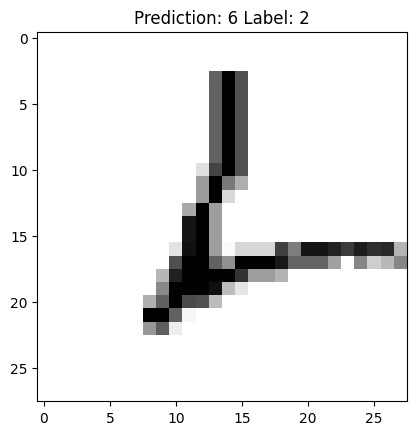

1/1 [==============================] - 0s 41ms/step


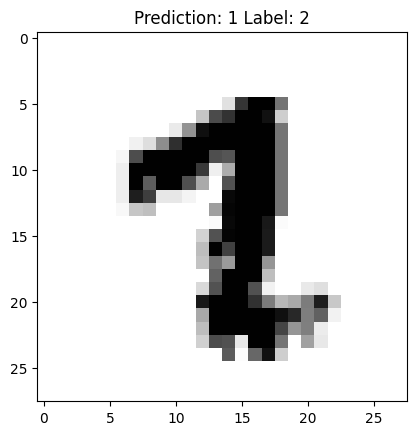

1/1 [==============================] - 0s 23ms/step


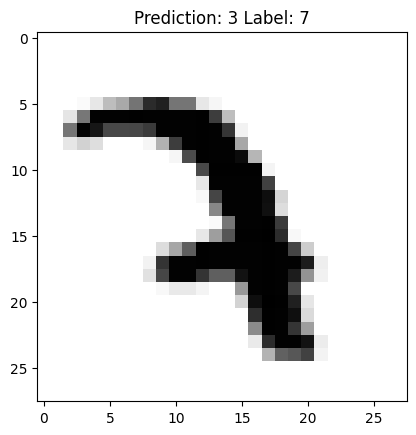

1/1 [==============================] - 0s 21ms/step


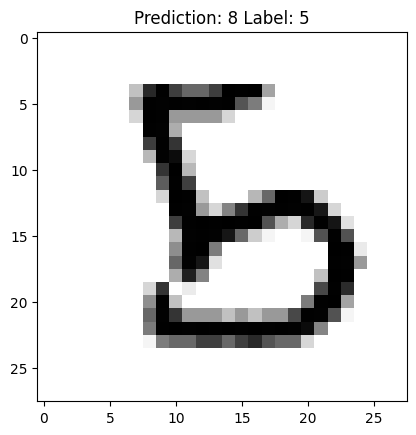

1/1 [==============================] - 0s 23ms/step


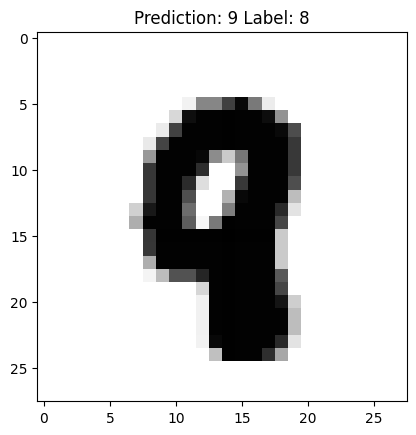

1/1 [==============================] - 0s 24ms/step


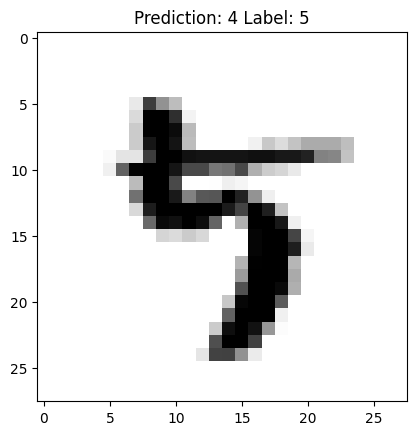

1/1 [==============================] - 0s 24ms/step


In [11]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()